##CIFAR-10 Image Classification using CNN
###This project implements a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset.
###The model is trained, evaluated, and improved using EarlyStopping to reduce overfitting.


In [1]:
## Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, datasets, layers
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
##Loading data
(train_images, train_labels),(test_images,test_labels)= datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
##Normalization
train_images, test_images = train_images /255.0 , test_images /255.0

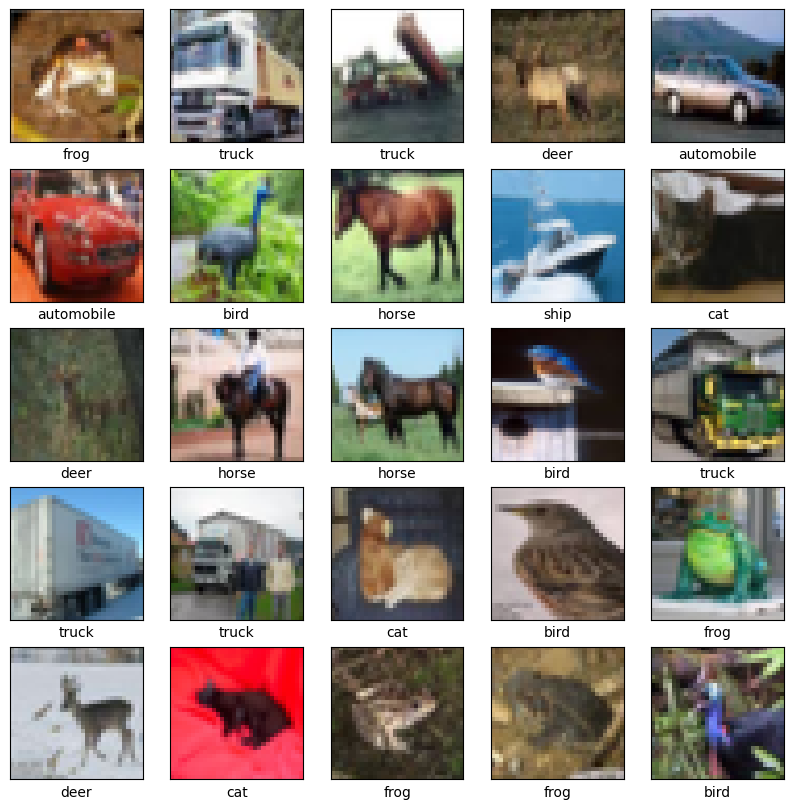

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


#TODO: create a fig of size (10,10)
plt.figure(figsize=(10,10))

for i in range(25) : #TODO: loop over 25 images
    plt.subplot(5,5,i+1) #todo: create a subplot of size 5,5
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) #dont show the grid
    plt.imshow(train_images[i]) #todo: plot the image of index i of the training set
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]]) #todo: add the class name of the image of index i
plt.show()

In [5]:
##Build CNN model
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [7]:
history1= model.fit(train_images,train_labels,epochs=10,
                   validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 42ms/step - accuracy: 0.3361 - loss: 1.7979 - val_accuracy: 0.5413 - val_loss: 1.2873
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 43ms/step - accuracy: 0.5544 - loss: 1.2512 - val_accuracy: 0.5764 - val_loss: 1.1939
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6088 - loss: 1.0955 - val_accuracy: 0.6253 - val_loss: 1.0680
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.6544 - loss: 0.9881 - val_accuracy: 0.6551 - val_loss: 0.9872
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.6820 - loss: 0.9008 - val_accuracy: 0.6790 - val_loss: 0.9341
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7096 - loss: 0.8270 - val_accuracy: 0.6820 - val_loss: 0.9198
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7285 - loss: 0.7781 - val_accuracy: 0.6907 - val_loss: 0.8996
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.7468 -

In [8]:
test_loss, test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 4s - 13ms/step - accuracy: 0.6927 - loss: 0.9264


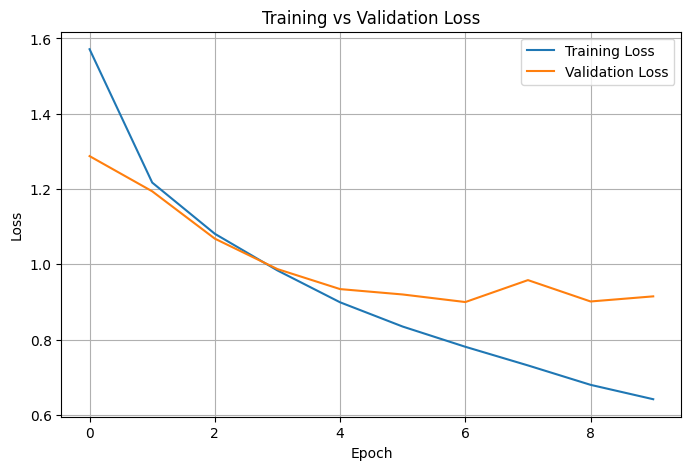

In [10]:
#Visualization for the training and validation  Loss (Model 1)

plt.figure(figsize=(8,5))

plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.show()

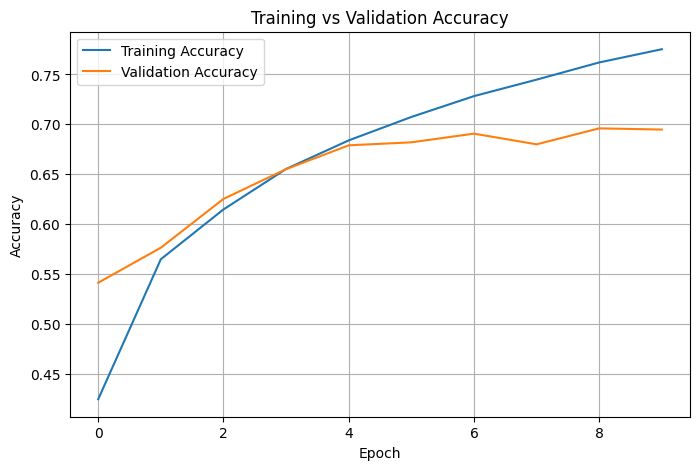

In [11]:
#Visualization for the training and validation accuracy (Model 1)

plt.figure(figsize=(8,5))

plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
##since we have overfitting, i decided to do other expermint using EarlyStopping

In [14]:
##Build CNN model(Model 2)
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(64, (3,3), activation="relu"))
model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(64, (3,3), activation="relu"))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation="relu"))
model_2.add(layers.Dense(10))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_2.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [17]:
early_stop = EarlyStopping(
    monitor='val_loss',          #watch validation loss
    patience=2,                  ##If val_loss stops improving for 2 epochs → stop training
    restore_best_weights=True    # go back to best model
)

In [18]:
history2 = model_2.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 44ms/step - accuracy: 0.3126 - loss: 1.8505 - val_accuracy: 0.5123 - val_loss: 1.3541
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.5410 - loss: 1.2678 - val_accuracy: 0.5861 - val_loss: 1.1684
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.6194 - loss: 1.0774 - val_accuracy: 0.6193 - val_loss: 1.0686
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.6593 - loss: 0.9679 - val_accuracy: 0.6531 - val_loss: 0.9929
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.6907 - loss: 0.8832 - val_accuracy: 0.6784 - val_loss: 0.9202
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.7194 - loss: 0.8130 - val_accuracy: 0.6842 - val_loss: 0.9154
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 42ms/step - accuracy: 0.7325 - loss: 0.7642 - val_accuracy: 0.6984 - val_loss: 0.8902
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.7518 -

In [19]:
test_acc=model_2.evaluate(test_images,test_labels,verbose=2)

313/313 - 3s - 11ms/step - accuracy: 0.6919 - loss: 0.9013


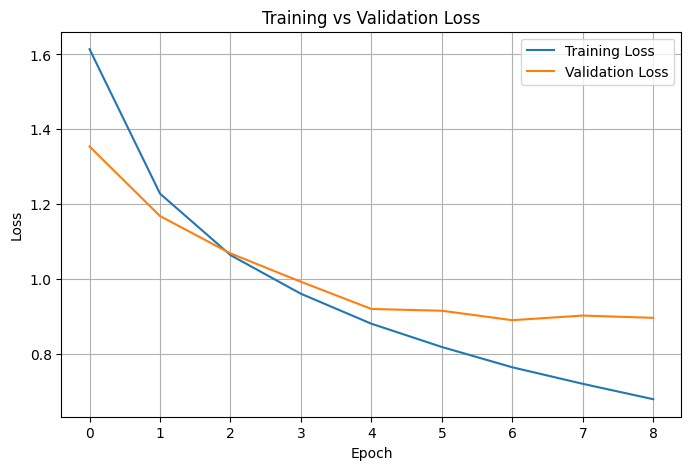

In [20]:
#Visualization for the training and validation Loss (Model2)
plt.figure(figsize=(8,5))

plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.show()

In [1]:
#Visualization for the training and validation accuracy (Model2)
plt.figure(figsize=(8,5))

plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()

NameError: name 'plt' is not defined

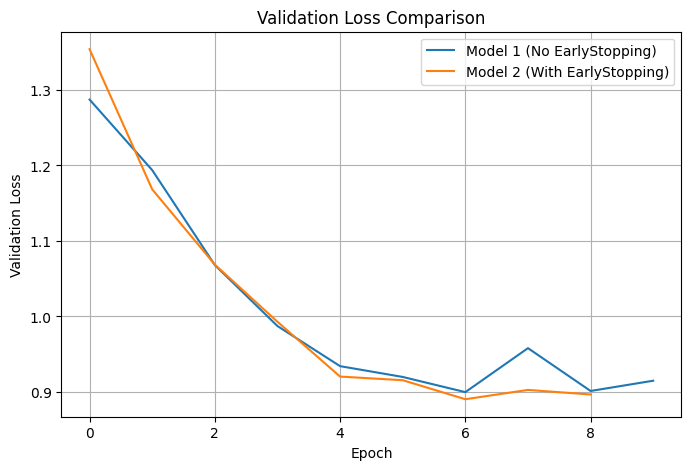

In [23]:
##The loss fucntion visualization between model1 and model2
plt.figure(figsize=(8,5))

plt.plot(history1.history['val_loss'], label='Model 1 (No EarlyStopping)')
plt.plot(history2.history['val_loss'], label='Model 2 (With EarlyStopping)')

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.grid(True)

plt.show()

In [27]:
Probability_model= tf.keras.Sequential([model_2,tf.keras.layers.Softmax()])
predictions= Probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


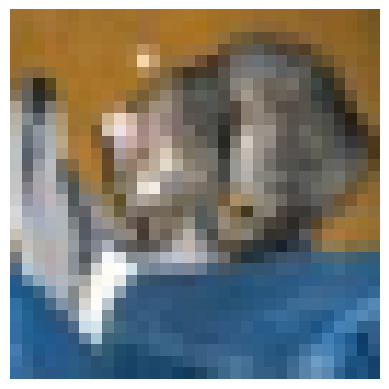

Predicted: cat
Confidence: 73.38 %
True label: cat


In [28]:
#Image Prediction Display
#This cell displays an image from the test set and its classification results, showing the predicted class, confidence, and the true label.
i = 0
# show image
plt.imshow(test_images[i])
plt.axis('off')
plt.show()

# prediction
predicted_class = tf.argmax(predictions[i]).numpy()
confidence = tf.reduce_max(predictions[i]).numpy()
true_class = test_labels[i][0]

print("Predicted:", class_names[predicted_class])
print("Confidence:", round(confidence * 100, 2), "%")
print("True label:", class_names[true_class])